::::{grid}
:gutter: 3

:::{grid-item-card}

```{image} ../../img/logoIGE_Color_Light.jpg
:alt: logo_ige
:class: bg-primary mb-1
:width: 50%
:align: center
```

:::

:::{grid-item}

:::

:::{grid-item-card}

```{image} ../../img/logo_UGA_imag.png
:alt: logo_uga
:class: bg-primary mb-1
:width: 90%
:align: center
```

:::

::::

<style type="text/css">
    table td{
    border:none;
    }
</style>

<table>
    <tr>
        <td>
            <center>
                <h1>Machine Learning to predict location of ice recrystallization</h1> <br>
                <hr>
                May - July 2022 <br>
                UGA and IGE internship <br>
                M1 Statistics and Data Sciences (SSD) <br> <br>
                Renan MANCEAUX <br>
                Supervisor : Thomas CHAUVE <br>
                <h1> Data exploration </h1>
            </center>
        </td>
    </tr>
</table>

-----------------------------------

(ax:threshold)=

# Tresholding data for class balance

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../../scripts/")
import utils

## Loading data

In [7]:
CI02 = utils.load_data("../../data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("../../data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("../../data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("../../data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("../../data/for_learning_plus/CI21.npy")

data = pd.concat((CI02,CI04,CI06,CI09,CI21))
data['Y'] = data['Y'].astype(object)

## Description of variables

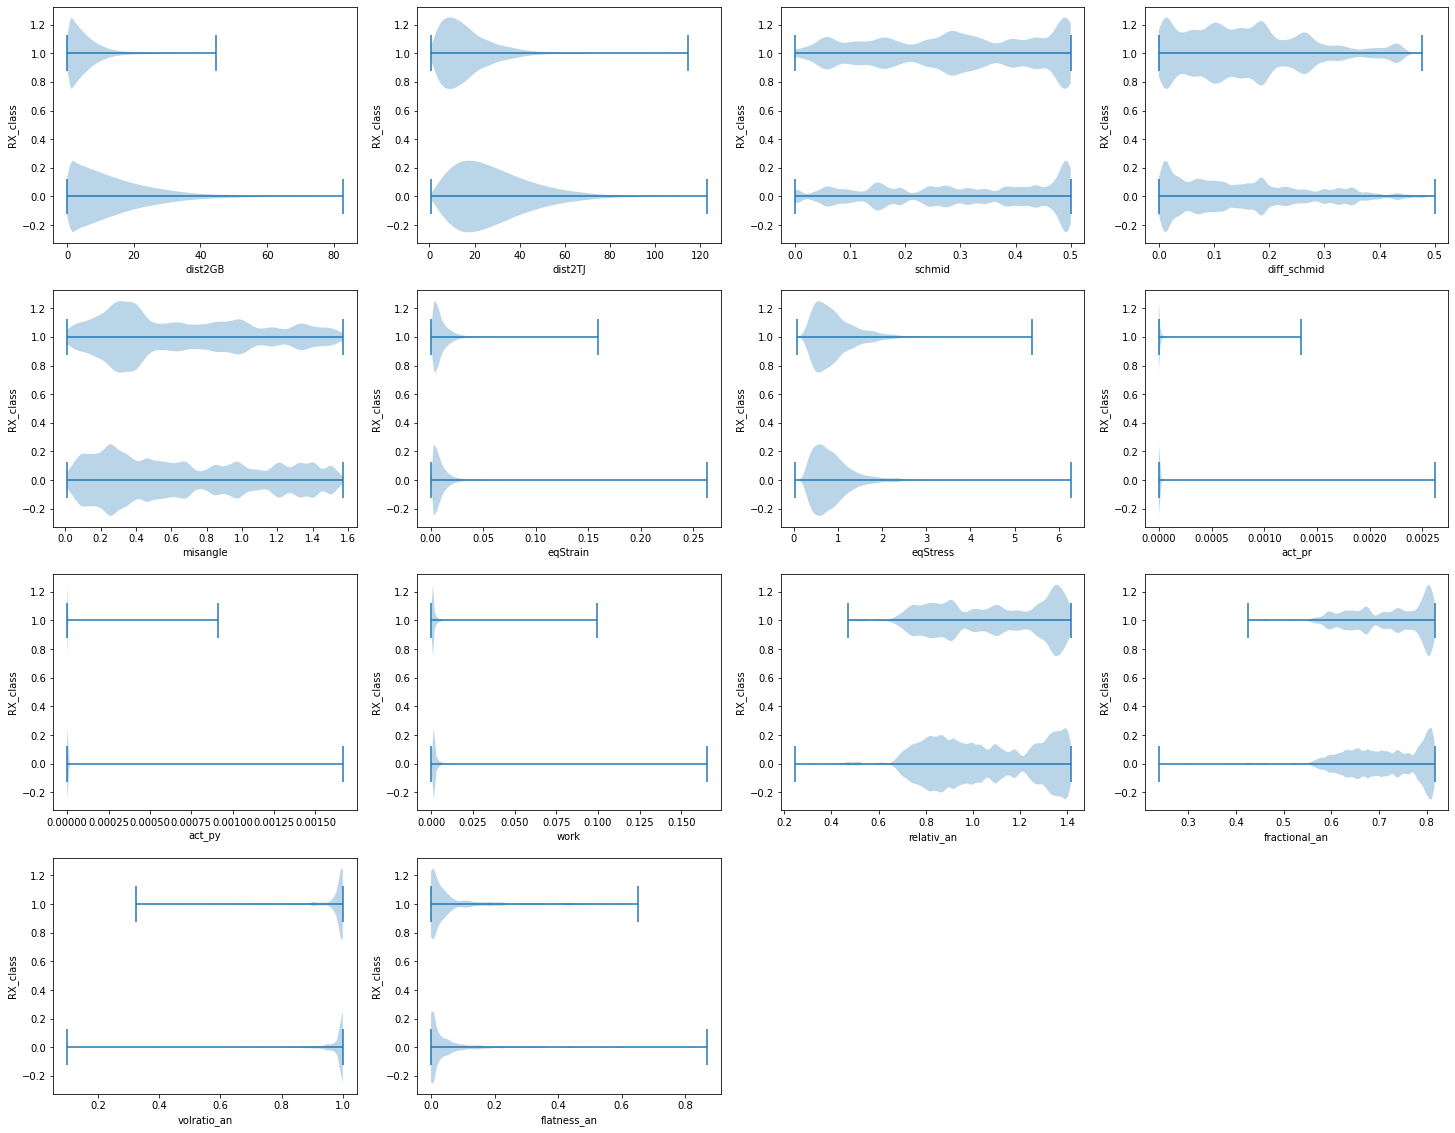

In [8]:
plt.figure(figsize=(25,20))
c = 1
for i in data.columns[1:]:
    plt.subplot(4,4,c)
    #plt.boxplot((data.loc[(data.Y==1),i],data.loc[(data.Y==0),i]),vert=False,flierprops=dict(markerfacecolor='k', marker='.',linewidth=0.1),widths=0.5,positions=[1,0])
    plt.violinplot((data.loc[(data.Y==1),i],data.loc[(data.Y==0),i]),vert=False,positions=[1,0])
    plt.xlabel(i)
    plt.ylabel("RX_class")
    c += 1

## Threshold on dist2GB

In [9]:
nb_crist = []
nb_ech = []
nb_tot = np.shape(data)[0]
x = list(range(70,0,-5))

nb_1 = len(data.loc[(data.Y==1),"Y"])
nb_0 = len(data.loc[(data.Y==0),"Y"])

for seuil in x :
    nb_crist.append(np.shape(data[(data["dist2GB"] < seuil ) & (data["Y"]==1)])[0])
    nb_ech.append(np.shape(data[(data["dist2GB"] < seuil)])[0])

pd.DataFrame(np.matrix((x,nb_ech,nb_crist,100*np.array(nb_crist)/np.array(nb_ech),-(1-(np.array(nb_crist)/nb_1))*100,-(1-((np.array(nb_ech)-np.array(nb_crist))/nb_0))*100)).T,columns=["dist2GB <","nb_sample","nb_crist","proportion of 1%)","1 lost (%)","0 lost (%)"])

dist2GB <  nb_sample  nb_crist  proportion of 1%)  1 lost (%)  0 lost (%)
0        70.0  1476608.0   95789.0           6.487097   -0.000000   -0.089287
1        65.0  1474770.0   95789.0           6.495182   -0.000000   -0.222278
2        60.0  1471219.0   95789.0           6.510859   -0.000000   -0.479215
3        55.0  1464681.0   95789.0           6.539922   -0.000000   -0.952279
4        50.0  1454225.0   95789.0           6.586945   -0.000000   -1.708835
5        45.0  1438692.0   95789.0           6.658062   -0.000000   -2.832742
6        40.0  1415287.0   95744.0           6.764988   -0.046978   -4.522981
7        35.0  1379449.0   95592.0           6.929723   -0.205660   -7.105082
8        30.0  1322163.0   95243.0           7.203575   -0.570003  -11.224823
9        25.0  1236385.0   94332.0           7.629662   -1.521051  -17.365470
10       20.0  1118626.0   92653.0           8.282750   -3.273862  -25.764569
11       15.0   951528.0   89335.0           9.388583   -6.737726  -37.615055
12       10.0   719824.0   80231.0          11.145919  -16.241948  -53.721529
13        5.0   390033.0   52431.0          13.442709  -45.264070  -75.572427

## Threshold on dist2TJ

In [10]:
nb_crist = []
nb_ech = []
nb_tot = np.shape(data)[0]
x = list(range(70,0,-5))

nb_1 = len(data.loc[(data.Y==1),"Y"])
nb_0 = len(data.loc[(data.Y==0),"Y"])

for seuil in x :
    nb_crist.append(np.shape(data[(data["dist2TJ"] < seuil ) & (data["Y"]==1)])[0])
    nb_ech.append(np.shape(data[(data["dist2TJ"] < seuil)])[0])

pd.DataFrame(np.matrix((x,nb_ech,nb_crist,100*np.array(nb_crist)/np.array(nb_ech),-(1-(np.array(nb_crist)/nb_1))*100,-(1-((np.array(nb_ech)-np.array(nb_crist))/nb_0))*100)).T,columns=["dist2TJ <","nb_sample","nb_crist","proportion of 1%)","1 lost (%)","0 lost (%)"])

dist2TJ <  nb_sample  nb_crist  proportion of 1%)  1 lost (%)  0 lost (%)
0        70.0  1436138.0   95236.0           6.631396   -0.577311   -2.977527
1        65.0  1415562.0   94981.0           6.709773   -0.843521   -4.447876
2        60.0  1387699.0   94689.0           6.823454   -1.148357   -6.442806
3        55.0  1350170.0   94367.0           6.989268   -1.484513   -9.134961
4        50.0  1300529.0   93704.0           7.205068   -2.176659  -12.678819
5        45.0  1235371.0   92661.0           7.500662   -3.265511  -17.317932
6        40.0  1149923.0   90834.0           7.899138   -5.172828  -23.368424
7        35.0  1043373.0   87755.0           8.410703   -8.387184  -30.855184
8        30.0   910662.0   83277.0           9.144666  -13.062043  -40.133627
9        25.0   755644.0   76645.0          10.143004  -19.985593  -50.870263
10       20.0   575385.0   66957.0          11.636904  -30.099490  -63.212120
11       15.0   383070.0   52139.0          13.610828  -45.568907  -76.055115
12       10.0   195100.0   31878.0          16.339313  -66.720605  -88.189889
13        5.0    55458.0   10869.0          19.598615  -88.653186  -96.773713

## Subdatasets

Text(0, 0.5, 'Distance to TJ')

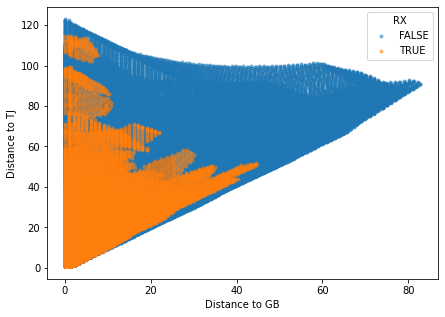

In [11]:
plt.figure(figsize=(7,5))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.legend(["FALSE",'TRUE'],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")

In [12]:
sub_data = data[(data["dist2GB"] < 30) & (data["dist2TJ"] < 60)]

nb_ech = np.shape(sub_data)[0]
nb_crist = np.shape(sub_data[sub_data["Y"]==1])[0]
nb_tot = np.shape(data)[0]
nb_tot_crist = np.shape(data[data["Y"]==1])[0]
prop = 100*np.array(nb_crist)/np.array(nb_ech)
print("taille du subdataset :",nb_ech)
print("nombre de pixels Y = 1 :",nb_crist)
print("perte de 0 :",((nb_ech-nb_crist)-(nb_tot-nb_tot_crist))/(nb_tot-nb_tot_crist)*100, "%")
print("perte de 1 :",(nb_crist-nb_tot_crist)/nb_tot_crist*100,"%")
print("proportion de 1 : ",prop,"%")

taille du subdataset : 1274623
nombre de pixels Y = 1 : 94143
perte de 0 : -14.585041239373597 %
perte de 1 : -1.7183601457369844 %
proportion de 1 :  7.385948629516335 %


Text(0, 0.5, 'Distance to TJ')

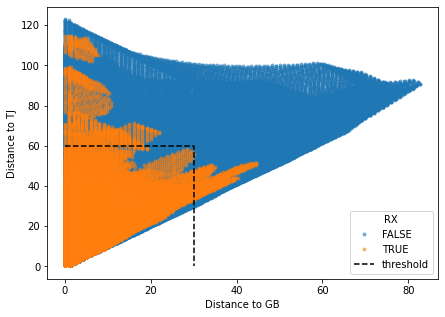

In [13]:
plt.figure(figsize=(7,5))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.plot([0,30,30],[60,60,0],"--k")
plt.legend(["FALSE",'TRUE',"threshold"],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")

In [14]:
sub_data2 = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

nb_ech = np.shape(sub_data2)[0]
nb_crist = np.shape(sub_data2[sub_data2["Y"]==1])[0]
nb_tot = np.shape(data)[0]
nb_tot_crist = np.shape(data[data["Y"]==1])[0]
prop = 100*np.array(nb_crist)/np.array(nb_ech)
print("taille du subdataset :",nb_ech)
print("nombre de pixels Y = 1 :",nb_crist)
print("perte de 0 :",((nb_ech-nb_crist)-(nb_tot-nb_tot_crist))/(nb_tot-nb_tot_crist)*100, "%")
print("perte de 1 :",(nb_crist-nb_tot_crist)/nb_tot_crist*100,"%")
print("proportion de 1 : ",prop,"%")

taille du subdataset : 934738
nombre de pixels Y = 1 : 88343
perte de 0 : -38.75813735073836 %
perte de 1 : -7.773335142866091 %
proportion de 1 :  9.451097526793605 %


Text(0, 0.5, 'Distance to TJ')

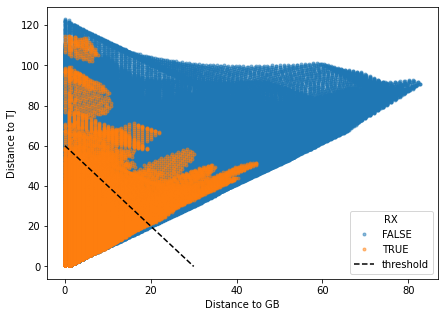

In [15]:
plt.figure(figsize=(7,5))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.plot([0,30],[60,0],"--k")
plt.legend(["FALSE",'TRUE',"threshold"],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")

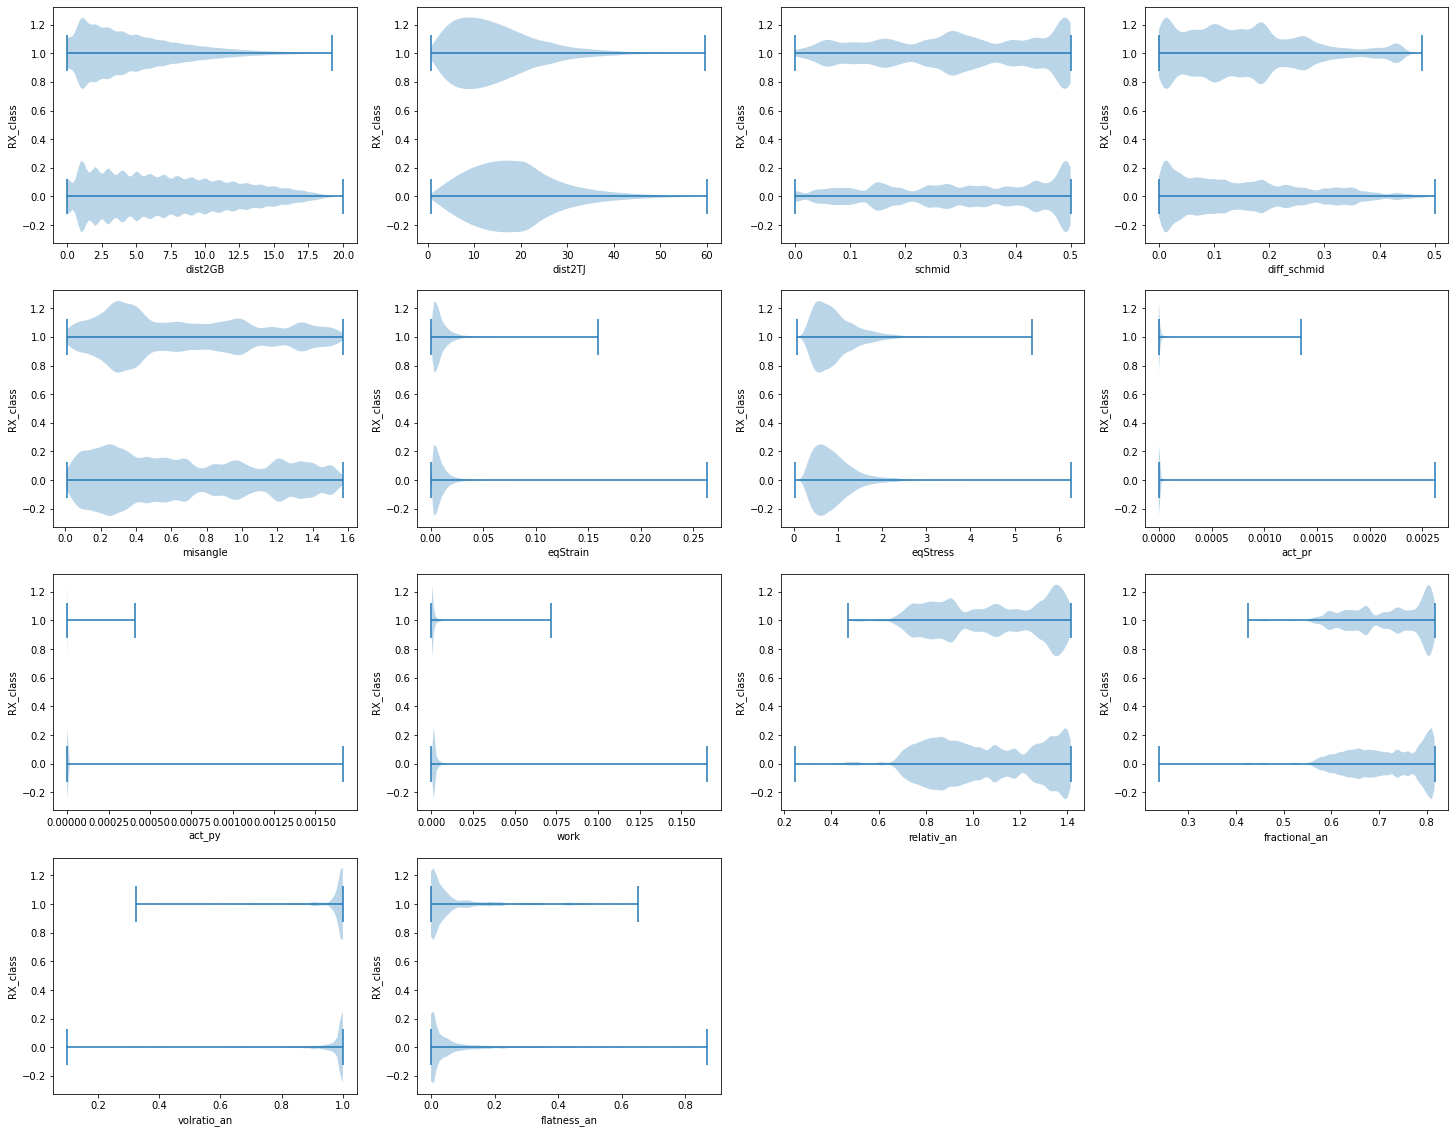

In [16]:
plt.figure(figsize=(25,20))
c = 1
for i in sub_data2 .columns[1:]:
    plt.subplot(4,4,c)
    #plt.boxplot((sub_data2.loc[(sub_data2.Y==1),i],sub_data2.loc[(sub_data2.Y==0),i]),vert=False,flierprops=dict(markerfacecolor='k', marker='.',linewidth=0.1),widths=0.5,positions=[1,0])
    plt.violinplot((sub_data2.loc[(sub_data2.Y==1),i],sub_data2.loc[(sub_data2.Y==0),i]),vert=False,positions=[1,0])
    plt.xlabel(i)
    plt.ylabel("RX_class")
    c += 1